Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load the Iris dataset

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Standardize the data

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_df)

Use the Elbow method to find the optimal number of clusters

In [7]:
wcss = []  # Within-cluster sums of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Plot the Elbow graph

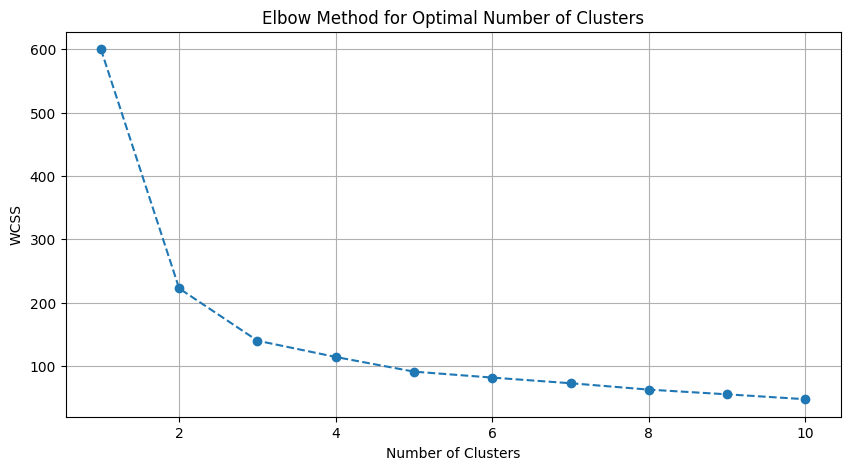

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Based on the Elbow graph, choose the optimal number of clusters (e.g., 3)

In [9]:
optimal_clusters = 3

Apply k-means clustering with the optimal number of clusters

In [10]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Visualize the clusters

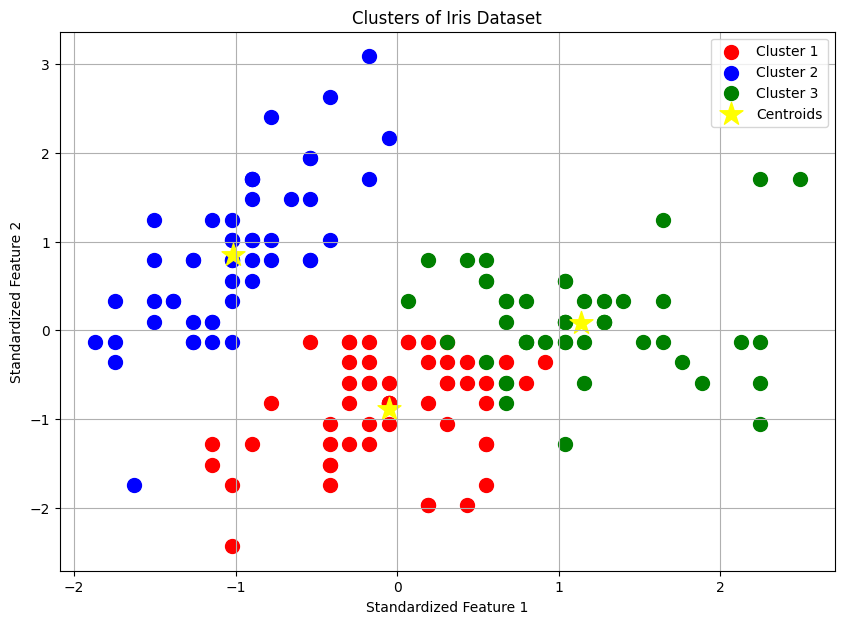

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Clusters of Iris Dataset')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.legend()
plt.grid(True)
plt.show()